In [2]:
import sys
sys.path.append('..')

In [3]:
from nomhsms.spectrum import Spectrum
from nomhsms.diff import Tmds
from chem import Reaction
from nomhsms.brutto import brutto_gen
import nomhsms.draw as draw

#### Discovery difference of soruce with product

In this example source was modifed by hydroquinone. So in product we expect to find source peak + quinone mass.

#### Load source

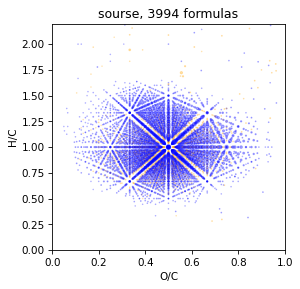

In [4]:
sourse = Spectrum.read_csv('sourse.csv', mapper={'m/z':'mass','I':'intensity'}, sep=',', take_columns=['mass','intensity'])
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,2)})
sourse = sourse.assign(generated_bruttos_table=gdf, rel_error=0.5)
draw.vk(sourse)

#### Load product

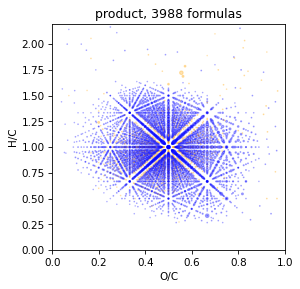

In [5]:
product = Spectrum.read_csv('product.csv', mapper={'m/z':'mass','I':'intensity'}, sep=',', take_columns=['mass','intensity'])
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,2)})
product = product.assign(generated_bruttos_table=gdf, rel_error=0.5)
draw.vk(product)

#### We can look difference spectrum

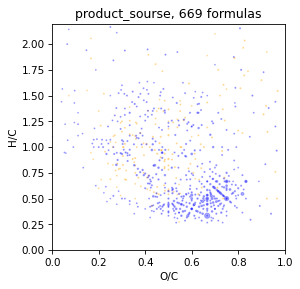

In [6]:
draw.vk(product - sourse)

#### Now calculate total mass differnce statistic

We use restrict brutto gen because we expect to find six carbon atom difference. But you can study another atoms ranges

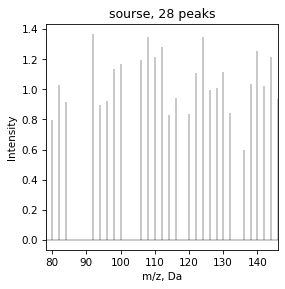

In [7]:
tmds_spec = Tmds(spec=sourse).calc(other=product, p=0.2, C13_filter=False) 
tmds_spec = tmds_spec.assign(brutto_dict={'C':(6,7),'H':(0,13), 'O':(0,5)})
tmds_spec = tmds_spec.calc_mass()
draw.spectrum(tmds_spec)

In [8]:
tmds_spec.table.sort_values(by='intensity', ascending=False)

,mass,intensity,assign,C,H,O,calc_mass
4,92.026,1.369304,True,6.0,4.0,1.0,92.026215
17,124.016,1.349024,True,6.0,4.0,3.0,124.016045
10,108.021,1.348022,True,6.0,4.0,2.0,108.021130
0,78.047,1.343515,True,6.0,6.0,0.0,78.046950
12,112.052,1.281673,True,6.0,8.0,2.0,112.052430
24,140.011,1.254882,True,6.0,4.0,4.0,140.010960
11,110.037,1.212819,True,6.0,6.0,2.0,110.036780
26,144.042,1.212068,True,6.0,8.0,4.0,144.042260
9,106.005,1.198297,True,6.0,2.0,2.0,106.005480
8,100.089,1.169004,True,6.0,12.0,1.0,100.088815


Now we can see that most abudant mass-difference is C6H4O1-3, that contain in quinone fragment. We can propose that modification by quinone is occure.

#### Find source and product peaks that was modifed

Now we look which peaks in sourse was modifed by C6H4O2 fragment, and find them in product.

In [11]:
reaction = Reaction(sourse=sourse, product=product)

In [13]:
reaction = reaction.find_modification(elems={'C':(6,7),'H':(4,5), 'O':(2,3)})

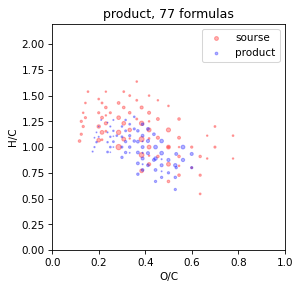

In [14]:
reaction.draw_modification()